<a href="https://colab.research.google.com/github/lokesh331/lokesh12/blob/main/3_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = {'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'Target': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}
df = pd.DataFrame(data)
X = df[['Feature1', 'Feature2']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
new_data = pd.DataFrame({'Feature1': [11], 'Feature2': [110]})
predicted_target = model.predict(new_data)
print(f"Predicted target for new data: {predicted_target}")


Mean Squared Error: 5.048709793414476e-28
R-squared: 1.0
Coefficients: [0.1980198  1.98019802]
Intercept: -2.842170943040401e-14
Predicted target for new data: [220.]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf




In [11]:
import pandas as pd
from google.colab import files
upload = files.upload()
file_name = list(upload.keys())[0]
cars = pd.read_csv(file_name)


Saving Cars.csv to Cars.csv


In [12]:
cars.shape


(81, 5)

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [14]:
cars.head()


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [15]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
cars.describe()


,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


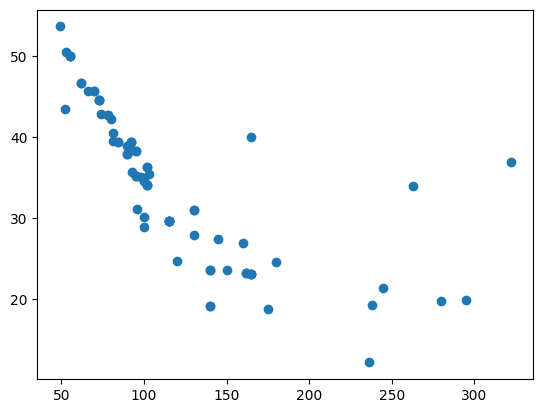

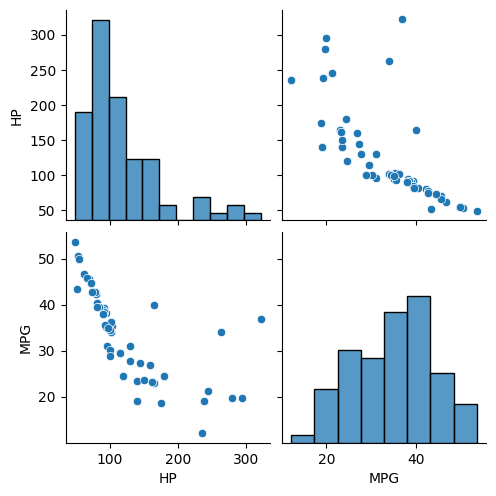

In [16]:
plt.scatter(cars['HP'], cars['MPG'])
sns.pairplot(cars[['HP', 'MPG']])


In [18]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~ WT+VOL+SP+HP', data=cars).fit()

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [21]:
print(model.tvalues, '\n',model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [22]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [23]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()
print(ml_v.tvalues, '\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [26]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
print(ml_w.tvalues, '\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [27]:
ml_wv=smf.ols('MPG~WT+VOL',data=cars).fit()
print(ml_wv.tvalues, '\n',ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [28]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.2774751389270127, 0.2683292546096331)

In [29]:
(ml_wv.rsquared,ml_wv.rsquared_adj)

(0.2821095616445982, 0.2637021145072803)